# 타이타닉 생존율 분석: 성별에 따른 생존율 시각화

이 노트북에서는 타이타닉 호 승객들의 성별에 따른 생존율을 분석하고 시각화합니다.

## 1. 필요한 라이브러리 임포트
먼저 분석에 필요한 라이브러리들을 임포트하고 타이타닉 데이터셋을 불러옵니다.

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 환경)
plt.rc('font', family='Malgun Gothic')

# 타이타닉 데이터셋 로드
df = sns.load_dataset('titanic')

## 2. 데이터 확인
데이터셋의 기본 정보를 확인하고 성별에 따른 생존 데이터를 분석하기 위한 전처리를 수행합니다.

In [2]:
# 성별에 따른 생존율 계산
survival_by_sex = df.groupby('sex')['survived'].agg(['count', 'sum'])
survival_by_sex['survival_rate'] = (survival_by_sex['sum'] / survival_by_sex['count']) * 100

print("성별에 따른 생존율:")
print(survival_by_sex)

성별에 따른 생존율:
        count  sum  survival_rate
sex                              
female    314  233      74.203822
male      577  109      18.890815


## 3. 시각화
seaborn을 사용하여 성별에 따른 생존율을 막대 차트로 시각화합니다.

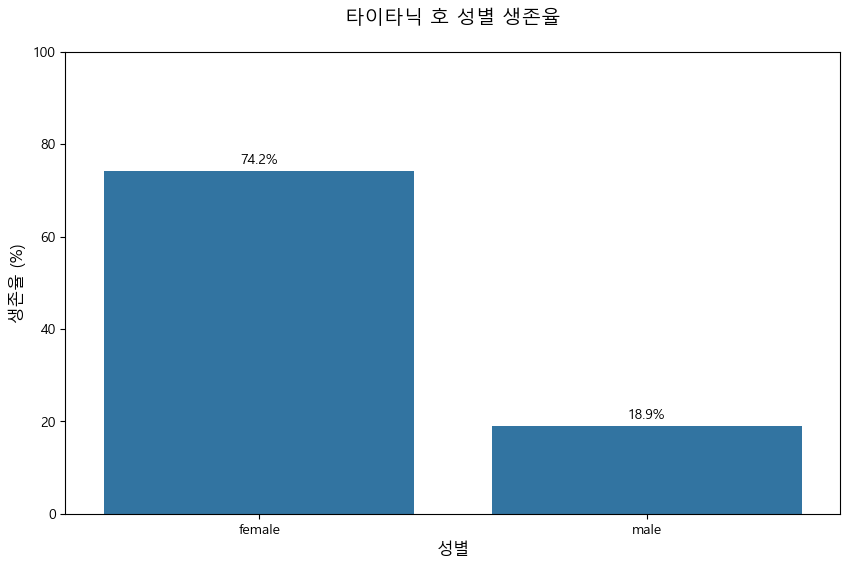

In [3]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 생성
sns.barplot(x=survival_by_sex.index, y='survival_rate', data=survival_by_sex)

# 그래프 타이틀과 레이블 설정
plt.title('타이타닉 호 성별 생존율', fontsize=14, pad=20)
plt.xlabel('성별', fontsize=12)
plt.ylabel('생존율 (%)', fontsize=12)

# y축 범위 설정 (0-100%)
plt.ylim(0, 100)

# 각 막대 위에 생존율 표시
for i, rate in enumerate(survival_by_sex['survival_rate']):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center', va='bottom')

plt.show()